# Using Random Numbers to Estimate Pi

Definitely not the most efficient way to approximate PI :)

This example uses a circle inscribed in a square, with the height of the square equal to the diameter fo the circle.

We know what the area of the square is $A_s = H^2$ (where $H$ is the height and width of the square). As the circle is inscribed in the square, the diameter, $D$, is $D = H = 2 * radius$. 

The area of the cirle is of course $ A_c = \pi r^2$. We can assume that if we randomly throw darts at this "dart board" that the probability the dart hits within the circle is related to the ratio of the area of the circle to the square. So that,

$$ 
\frac{P(C)}{P(S)} = \frac{A_c}{A_s} = \frac{\pi r^2}{(H^2)} = \frac{\pi r^2}{4r^2}
$$

If we rearrange for $\pi$, we can see that: 
$$
\pi = 4 * \frac{P(C)}{P(S)}
$$
which we can use as the basis of our simulation.

The idea is that we will randomly throw darts, and keep track of how many land within the circle (and the square), and how many land only within the square, but not the circle. Assuming that we never miss the board, every dart is withing the square, so that probability is one.

So with our simulation, we just have to throw a ton of darts, keep track of the results to estimate the fraction of times the dart lands within the circle (and multiply by 4 as above) to estimate the $\pi$.

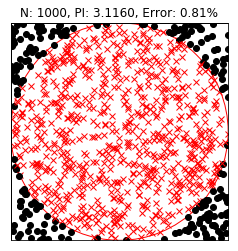

In [4]:
import math
import random
import matplotlib.pyplot as plt

# This function generates a random 'dart' position for us
def throw_dart(radius):
    return (random.uniform(-radius, radius),
            random.uniform(-radius, radius))

# This is how we'll check to see if the dart hit within the circle
# or not
def is_within_circle(x, y, radius):
    return math.sqrt(x**2 + y**2) < radius

# This plots a red x if the 'dart' hit in the circle otherwise
# we plot a black 'o'
def add_to_plot(x, y, radius, in_circle):
    fmt = 'rx' if in_circle else 'ko'
    plt.plot(x, y, fmt)

# Here we're just handling the set up / drawing our shapes
def plot_shape_outlines(radius):
    circle = plt.Circle((0,0), radius, fill=False, ec="r")
    square = plt.Rectangle((-radius,-radius), 2*radius,
                           2*radius, fill=False, ec="k")
    plt.gca().add_patch(circle)
    plt.gca().add_patch(square)
    plt.ylim([-radius, radius]); plt.yticks([])
    plt.xlim([-radius, radius]); plt.xticks([])
    plt.gca().set_aspect(1.0)

# The radius of our circle (and 1/2 height or width of square)
R = 1.0

# How many darts to throw?
number_of_darts_to_throw = 1000

# Plot the shape outlines 
plt.figure()
plot_shape_outlines(R)

throw_counter = 0
hit_counter = 0
# This is where we actually throw the darts!
while throw_counter < number_of_darts_to_throw:
        
    # Make a random dart and throw it...
    x, y = throw_dart(R)
    throw_counter += 1
        
    # ...it hits the board, is it within the circle?
    in_circle = is_within_circle(x, y, R)
    hit_counter += in_circle
        
    # Now we add the point to the plot...
    add_to_plot(x, y, R, in_circle)
    
pi = 4.0 * (hit_counter / throw_counter)
diff = abs(math.pi - pi) / math.pi * 100.0
plt.title(F"N: {throw_counter}, PI: {pi:.4f}, Error: {diff:.2f}%")
plt.show()